Jason Cain, Nathan Harms, Marissa Puzan
## Serotonin transport modeling 


Laminar flow model:

## $$ \frac{C_m}{C_o} = \sum_{n} M_n e^{- \beta^2 Gz} $$



from
$$v_z \frac{\partial C}{\partial z} = D \frac{1}{r} \frac{\partial}{\partial r} \left( r \frac{\partial C}{\partial r} \right)$$
where 

$$ Gz = \frac{D L}{V_m R^2} $$

$$ P_w^* = P_w \left( \frac{R}{D} \right) $$

$$ M_n = f( P_w^* ) $$ 

$$ \beta = f( P_w^* ) $$ 

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from collections import namedtuple

In [2]:
import laminarFlow

In [3]:
ConditionSet = namedtuple('ConditionSet', ['Concentration', 'Diffusivity', 'Permeability'])

serCondition = ConditionSet(
                Concentration = .1,
                Diffusivity = 6.2424e-8,
                Permeability =7.576e-13)

trypCondition = ConditionSet(
                Concentration = .1,
                Diffusivity = 5.386e-8,
                Permeability = 6.44e-4)

radius = 1./12
length = 25
max_velocity = 5
iterations = 200


In [4]:
Model = laminarFlow.LaminarFlow(length, radius, serCondition, trypCondition, iterations)

[  1.00000000e-04   1.00000000e-02   1.00000000e-01   2.50000000e-01
   5.00000000e-01   7.50000000e-01   1.00000000e+00   2.00000000e+00
   4.00000000e+00   6.00000000e+00   8.00000000e+00   1.00000000e+01
   2.50000000e+01   5.00000000e+01   7.50000000e+01   1.00000000e+02
   1.00000000e+03   1.00000000e+04]
[  1.00000000e-04   1.00000000e-02   1.00000000e-01   2.50000000e-01
   5.00000000e-01   7.50000000e-01   1.00000000e+00   2.00000000e+00
   4.00000000e+00   6.00000000e+00   8.00000000e+00   1.00000000e+01
   2.50000000e+01   5.00000000e+01   7.50000000e+01   1.00000000e+02
   1.00000000e+03   1.00000000e+04]


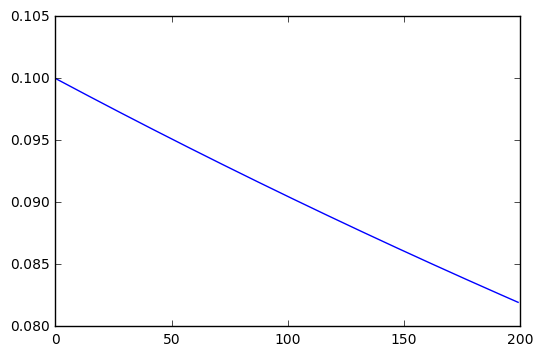

In [5]:
plt.plot(Model.serConcentration)

In [7]:
from SALib.sample.saltelli import sample as ss
from SALib.analyze.sobol import analyze as sa


In [ ]:
def laminarModel(data):
    serCondition = ConditionSet(
                Concentration = .1,
                Diffusivity = 6.2424e-8,
                Permeability =7.576e-13)

    trypCondition = ConditionSet(
                Concentration = .1,
                Diffusivity = 5.386e-8,
                Permeability = 6.44e-4)

    radius = 1./12
    length = 25
    max_velocity = 5
    iterations = 200


In [ ]:
morris_problem = {
    # There are six variables
    'num_vars': 6,
    # These are their names
    'names': ['conn', 'batt', 'dist', 'range', 'dri_eff', 'inv_eff', 'dispatch_time'],
    # These are their plausible ranges over which we'll move the variables
    'bounds': [[2.3, 22], # connection_power (kW)
               [50, 100], # battery size (kWh)
               [0, 80], # distance driven (km)
               [0, 80], # range buffer (km)
               [4,5.5], # driving efficiency (kWh/km)
               [0.87,0.97], # inverter efficienct (%)
               [0.5, 24] # dispatch time - hours of the day in which the energy is dispatched
              ],
    # I don't want to group any of these variables together
    'groups': None
    }